# Text Similarity

Fait par : EL MAHFOUD RADOUANE

The first thing is to compute sentence embeddings, then compare them to each other. 

* After my embeddings I will use the cosine similarity.

###  Cosine Similarity with TF-IDF (Method 1 to do embeddings)

This method uses the TfidfVectorizer from Scikit-Learn to convert text into TF-IDF vectors and then calculates the cosine similarity.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample Sentences
text1 = "The new movie is awesome"
text2 = "The new film is so great"

# Convert texts to TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([text1, text2])

# Calculate Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
print(f"Cosine Similarity: {cosine_sim[0][0]}")

Cosine Similarity: 0.38087260847594373


### Semantic Similarity Using Sentence Transformers (Method 2 to do embeddings)

In [12]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

In [23]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load a pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Sample texts
text1 = "The new movie is awesome"
text2 = "The new film is so great"

# Generate embeddings
embeddings = model.encode([text1, text2])

# Compute cosine similarity
cosine_sim = cosine_similarity([embeddings[0]], [embeddings[1]])
print(f"Cosine Similarity: {cosine_sim[0][0]}")

Cosine Similarity: 0.8692852854728699


### Using BERT for Semantic Similarity ((Method 3 to do embeddings))

For this, we install the transformers library by Hugging Face.

In [24]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained model tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Sample texts
text1 = "I love reading books."
text2 = "I enjoy books about programming."

# Encode text
encoded_input1 = tokenizer(text1, return_tensors='pt')
encoded_input2 = tokenizer(text2, return_tensors='pt')

# Compute BERT embeddings
with torch.no_grad():
    output1 = model(**encoded_input1)
    output2 = model(**encoded_input2)

# Mean pooling
embeddings1 = torch.mean(output1.last_hidden_state, dim=1)
embeddings2 = torch.mean(output2.last_hidden_state, dim=1)

# Calculate cosine similarity
cosine_sim = cosine_similarity(embeddings1, embeddings2)
print(f"Cosine Similarity: {cosine_sim[0][0]}")

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\user\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Cosine Similarity: 0.8484784364700317


When dealing with a dataset of sentences and aiming to capture semantic similarities, transformer-based models like BERT or sentence transformers are generally the best option. They are specifically designed to understand the context , making them superior for capturing semantic meanings compared to traditional methods like TF-IDF or basic word embeddings.

There have been a lot of approaches for Semantic Similarity. The most straightforward and effective method now is to use a powerful model (e.g. transformer) to encode sentences to get their embeddings and then use a similarity metric (e.g. cosine similarity) to compute their similarity score.

### Our Use case 

In [25]:
import pandas as pd

In [28]:
with open('sentences.csv') as f:
    lines = f.readlines()
lines=lines[1:]

In [29]:
sentences_df=pd.DataFrame({'sentences':lines})

In [30]:
sentences_df.head()

,sentences
0,A girl is styling her hair.\n
1,A group of men play soccer on the beach.\n
2,One woman is measuring another woman's ankle.\n
3,A man is cutting up a cucumber.\n
4,A man is playing a harp.\n


Handling a dataset with sentences in multiple languages adds complexity to the preprocessing and semantic similarity analysis. Each language has its own set of stopwords, punctuation rules, and semantic nuances.

#### Language Detection
First, we identify the language of each sentence. This can be done using libraries like langdetect.

In [33]:
from langdetect import detect

In [39]:
# Detect language and preprocess
def detect_language(sentence):
    try:
        lang = detect(sentence)
    except:
        lang = "unknown"
    return lang

### Preprocess sentences

In [40]:
import string
# Apply the preprocessing function to your dataset
def preprocess_sentence(sentence):
    sentence = sentence.lower()
    # remove all punctuation from the sentence string
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    return sentence

sentences_df['processed_sentences'] = sentences_df['sentences'].apply(preprocess_sentence)

In [41]:
sentences_df['lang'] = sentences_df['sentences'].apply(detect_language)

In [46]:
sentences_df['lang'].unique()

array(['en', 'tl', 'pt', 'nl', 'id', 'ca', 'af', 'fr', 'it', 'no', 'cs',
       'et', 'de', 'es', 'sv', 'da', 'ro', 'so', 'cy', 'fi', 'sl'],
      dtype=object)

In [47]:
len(sentences_df['lang'].unique())

21

In [59]:
sentences_df['lang'].value_counts()

it    2711
fr    2698
es    2688
en    2616
tl      86
pt      56
ca      55
af      30
nl      20
id      17
de      10
sv      10
no       7
da       6
ro       6
sl       5
fi       4
et       3
so       2
cy       1
cs       1
Name: lang, dtype: int64

<BarContainer object of 21 artists>

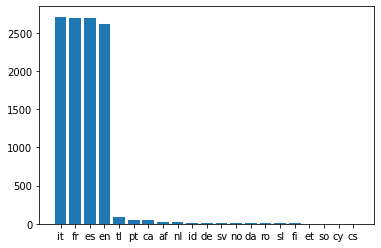

In [57]:
import matplotlib.pyplot as plt
plt.bar(sentences_df['lang'].value_counts().index,sentences_df['lang'].value_counts().values)

In [60]:
# Load a multilingual model
model = SentenceTransformer('distiluse-base-multilingual-cased-v2')

In [62]:
'''# Convert sentences to embeddings
embeddings = model.encode(sentences_df['processed_sentences'].tolist(), show_progress_bar=True)'''

Batches:   0%|          | 0/345 [00:00<?, ?it/s]

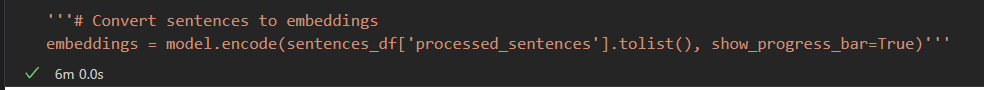

In [65]:
import pickle
# Save the embeddings to a file
embeddings_file = 'embeddings.pkl'
with open(embeddings_file, 'wb') as file:
    pickle.dump(embeddings, file)

In [66]:
# Load the embeddings from the file
embeddings_file = 'embeddings.pkl'
with open(embeddings_file, 'rb') as file:
    loaded_embeddings = pickle.load(file)

In [63]:
# Compute pairwise cosine similarity
similarity_matrix = cosine_similarity(embeddings)

# Example: Print similarity between the first and second sentences
print(f"Similarity between first and second sentences: {similarity_matrix[0][1]}")

Similarity between first and second sentences: -0.015058732591569424


In [102]:
embeddings.shape

(11032, 512)

In [76]:
sentences_df.to_csv('sentences_df.csv')

#### Question 1 : The n most similar sentences in same language.

In [116]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


def similar_sentences_same_language(lang,n,index):
    # Filter the dataset to include only sentences in the language choosen
    lang_sentences_df = sentences_df[sentences_df['lang'] == lang]

    # Convert English sentences to embeddings
    lang_embeddings = model.encode(lang_sentences_df['processed_sentences'].tolist(), show_progress_bar=True)

    # Calculate pairwise cosine similarity for sentences
    lang_similarity_matrix = cosine_similarity(lang_embeddings)

    # Find the index of the sentence you want to compare (e.g., the first sentence)
    target_sentence_index = index  # Change this to the desired sentence index

    # Get the similarity scores for the target sentence
    similarity_scores = lang_similarity_matrix[target_sentence_index]

    # Sort sentences by similarity scores in descending order
    sorted_indices = np.argsort(similarity_scores)[::-1]

    # Select the top 5 most similar sentences (excluding the target sentence)
    n = n
    top_n_similar_indices = [i for i in sorted_indices if i != target_sentence_index][:n]

    # Get the actual sentences corresponding to the top indices
    top_n_similar_sentences = english_sentences_df['sentences'].iloc[top_n_similar_indices].tolist()

    return top_n_similar_sentences

In [110]:
# Now, top_n_similar_sentences contains the top 5 most similar English sentences to the target sentence
top_n_similar_sentences

['A group of boys are playing soccer on the beach.\n',
 'Men are playing soccer.\n',
 'Two men are playing football.\n',
 'A man is kicking a soccer ball.\n',
 'A man is playing a football.\n']

In [118]:
sentences_df.head()

,sentences,processed_sentences,lang
0,A girl is styling her hair.\n,a girl is styling her hair\n,en
1,A group of men play soccer on the beach.\n,a group of men play soccer on the beach\n,en
2,One woman is measuring another woman's ankle.\n,one woman is measuring another womans ankle\n,en
3,A man is cutting up a cucumber.\n,a man is cutting up a cucumber\n,en
4,A man is playing a harp.\n,a man is playing a harp\n,tl


In [117]:
similar_sentences_same_language('en',5,1)

Batches:   0%|          | 0/82 [00:00<?, ?it/s]

['A group of boys are playing soccer on the beach.\n',
 'Men are playing soccer.\n',
 'Two men are playing football.\n',
 'A man is kicking a soccer ball.\n',
 'A man is playing a football.\n']

#### Question 2 : The n most similar sentences to the input sentence among entire list of sentences, independently from language.

In [128]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def similar_sentences(n,index):
    # Find the index of the sentence you want to compare (e.g., the first sentence)
    target_sentence_index = index  

    # Get the similarity scores for the target sentence
    similarity_scores = similarity_matrix[target_sentence_index]

    # Sort sentences by similarity scores in descending order
    sorted_indices = np.argsort(similarity_scores)[::-1]

    # Select the top 5 most similar sentences (excluding the target sentence itself)
    n = n
    top_n_similar_indices = [i for i in sorted_indices if i != target_sentence_index][:n]

    # Get the actual sentences corresponding to the top indices
    top_n_similar_sentences = sentences_df['sentences'].iloc[top_n_similar_indices].tolist()

    return top_n_similar_sentences

In [129]:
# here the sentence is = "a girl is styling her hair"
similar_sentences(5,0)

['The woman is styling her hair.\n',
 'Une fille se coiffe.\n',
 'Una ragazza si acconcia i capelli.\n',
 'Une fille se brosse les cheveux.\n',
 'Una chica se estأ، arreglando el pelo.\n']

#### Question 3 : Extra: return percentage of similarity and execution time. 

In [139]:
import time

def similar_sentences(n, index):
    # Record the start time
    start_time = time.time()

    # Find the index of the sentence you want to compare (e.g., the first sentence)
    target_sentence_index = index

    # Get the similarity scores for the target sentence
    similarity_scores = similarity_matrix[target_sentence_index]

    # Sort sentences by similarity scores in descending order
    sorted_indices = np.argsort(similarity_scores)[::-1]

    # Select the top n most similar sentences (excluding the target sentence itself)
    n = n
    top_n_similar_indices = [i for i in sorted_indices if i != target_sentence_index][:n]

    # Get the actual sentences corresponding to the top indices
    top_n_similar_sentences = sentences_df['sentences'].iloc[top_n_similar_indices].tolist()

    # Calculate the percentage of similarity for the top sentence
    similarity_percentage=[]
    for i in range(n):
        similarity_percentage.append((similarity_scores[top_n_similar_indices[i]] * 100).round(2))

    # Calculate the execution time
    execution_time = time.time() - start_time

    return top_n_similar_sentences, similarity_percentage, execution_time

In [147]:
# here the sentence is = "a girl is styling her hair"
result, similarity_percentage, execution_time = similar_sentences(5, 0)

In [149]:
result

['The woman is styling her hair.\n',
 'Une fille se coiffe.\n',
 'Una ragazza si acconcia i capelli.\n',
 'Une fille se brosse les cheveux.\n',
 'Una chica se estأ، arreglando el pelo.\n']

In [148]:
similarity_percentage

[89.39, 88.07, 87.47, 87.42, 82.06]

In [150]:
execution_time

0.003999471664428711



        END